In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

Reading Data

In [2]:
#Read CSV file into a pandas dataframe
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


Data Manipulation

In [3]:
# 2.1> Create new column: TOtal_Bicycle_Count
data['Total_Bicycle_Count'] = data['Fremont Bridge East Sidewalk'] + data['Fremont Bridge West Sidewalk']
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total_Bicycle_Count
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,13.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,10.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,5.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,7.0


In [4]:
#Check data types for each column in the data
data.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
Total_Bicycle_Count             float64
dtype: object

In [5]:
#Covert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
Total_Bicycle_Count                    float64
dtype: object

In [6]:
# 2.2> Extract Hour from the Date into a new column
data['Hour'] = data['Date'].dt.hour

# 2.3> Extract Year from the Date into a new column
data['Year'] = data['Date'].dt.year
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total_Bicycle_Count,Hour,Year
0,2012-10-03 00:00:00,13.0,4.0,9.0,13.0,0,2012
1,2012-10-03 01:00:00,10.0,4.0,6.0,10.0,1,2012
2,2012-10-03 02:00:00,2.0,1.0,1.0,2.0,2,2012
3,2012-10-03 03:00:00,5.0,2.0,3.0,5.0,3,2012
4,2012-10-03 04:00:00,7.0,6.0,1.0,7.0,4,2012


In [7]:
# 3> Filter out all rows except for Year = 2016

data_2016 = data[data['Year'] == 2016]
data_2016.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total_Bicycle_Count,Hour,Year
28440,2016-01-01 00:00:00,18.0,9.0,9.0,18.0,0,2016
28441,2016-01-01 01:00:00,15.0,3.0,12.0,15.0,1,2016
28442,2016-01-01 02:00:00,11.0,6.0,5.0,11.0,2,2016
28443,2016-01-01 03:00:00,7.0,1.0,6.0,7.0,3,2016
28444,2016-01-01 04:00:00,2.0,0.0,2.0,2.0,4,2016


Exploratory Analysis

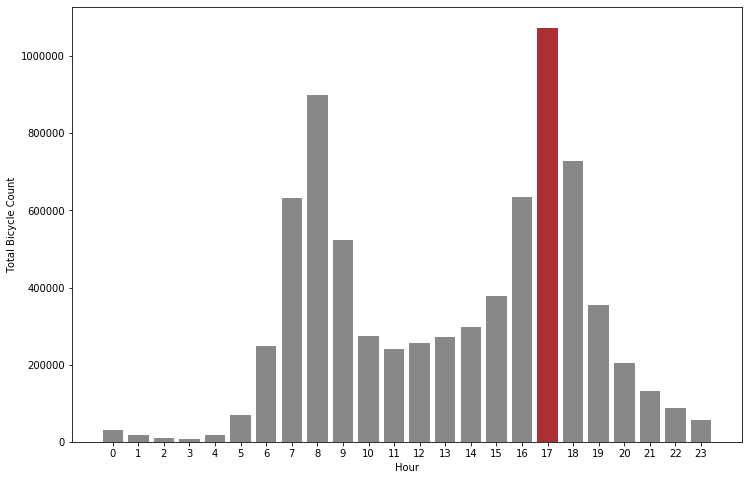

In [8]:
# 4> Plot total bicycle counts by hour 

total_bicycle_hourly = data.groupby("Hour")["Total_Bicycle_Count"].sum()
total_bicycle_hourly = pd.DataFrame(total_bicycle_hourly).reset_index()

# create bar plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=total_bicycle_hourly["Hour"], height=total_bicycle_hourly["Total_Bicycle_Count"],)
ax.set_xticks(total_bicycle_hourly["Hour"])

#I wanted to highlight the maximum in the plot, so used this approach. 
#reference: https://stackoverflow.com/questions/20394091/pandas-matplotlib-make-one-color-in-barplot-stand-out
for bar in ax.patches:
    bar.set_facecolor('#888888')

highlight = total_bicycle_hourly['Total_Bicycle_Count'].idxmax()
pos = total_bicycle_hourly.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#aa3033')
# set chart title and axis labels
plt.xlabel("Hour")
plt.ylabel("Total Bicycle Count")

plt.show()


Arithmetic Operations

In [9]:
# 5> Find on average which is the busiest hour of the day
avg_traffic_hour = data.groupby("Hour")["Total_Bicycle_Count"].mean()
avg_traffic_hour = pd.DataFrame(avg_traffic_hour)

avg_traffic_hour[avg_traffic_hour["Total_Bicycle_Count"] == max(avg_traffic_hour["Total_Bicycle_Count"])]

,Total_Bicycle_Count
Hour,
17,392.289003
